In [1]:
import numpy as np
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder as oneHot
from logistic_regression2 import logistic_regression as lr
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

W0707 18:57:13.313506 140640174573376 deprecation_wrapper.py:119] From /home/jahan/Documents/algorithms/logistic_regression2.py:3: The name tf.enable_eager_execution is deprecated. Please use tf.compat.v1.enable_eager_execution instead.



In [2]:
x_train, x_test = x_train.reshape(60000,28*28) / 255.0, x_test.reshape(10000,28*28) / 255.0
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)
onehot = oneHot()
onehot.fit(y_train)
y_train = onehot.transform(y_train).toarray()
y_test = onehot.transform(y_test).toarray()

/home/jahan/miniconda3/envs/ml_cpu/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [3]:
logistic = lr(x_train,y_train)

True


In [4]:
costs, accuracies = logistic.train(100)

2.302599
Epoch: 0  Cost: 2.302599  AUC: 0.5
2.251414
Epoch: 1  Cost: 2.251414  AUC: 0.8391199
2.201614
Epoch: 2  Cost: 2.201614  AUC: 0.8797909
2.1531203
Epoch: 3  Cost: 2.1531203  AUC: 0.89378226
2.1058776
Epoch: 4  Cost: 2.1058776  AUC: 0.9032414
2.0598304
Epoch: 5  Cost: 2.0598304  AUC: 0.91107297
2.0149312
Epoch: 6  Cost: 2.0149312  AUC: 0.91813165
1.9711415
Epoch: 7  Cost: 1.9711415  AUC: 0.924403
1.9284304
Epoch: 8  Cost: 1.9284304  AUC: 0.92986727
1.8867761
Epoch: 9  Cost: 1.8867761  AUC: 0.934977
1.8461612
Epoch: 10  Cost: 1.8461612  AUC: 0.93929595
1.8065746
Epoch: 11  Cost: 1.8065746  AUC: 0.9431545
1.7680092
Epoch: 12  Cost: 1.7680092  AUC: 0.94660807
1.7304604
Epoch: 13  Cost: 1.7304604  AUC: 0.9496412
1.6939268
Epoch: 14  Cost: 1.6939268  AUC: 0.9522751
1.6584079
Epoch: 15  Cost: 1.6584079  AUC: 0.9545548
1.6239029
Epoch: 16  Cost: 1.6239029  AUC: 0.95662606
1.5904096
Epoch: 17  Cost: 1.5904096  AUC: 0.9583266
1.5579245
Epoch: 18  Cost: 1.5579245  AUC: 0.9598615
1.5264404


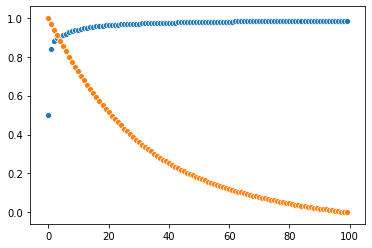

In [9]:
sns.scatterplot(np.arange(0,len(accuracies),1),accuracies)
sns.scatterplot(np.arange(0,len(costs),1),(costs-np.min(costs))/(np.max(costs)-np.min(costs)))

2.251414
